In [ ]:
! pip install wikipedia
import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd


  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11695 sha256=83846fd3b6d5e4ed1ad29b58c005983355b347d3b5dee61c26f950285049592f
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in sqrt
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Z contains NaN values. This may result in rendering artifacts.


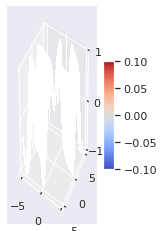

In [70]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from mpl_toolkits.mplot3d.axes3d import get_test_data

fig=plt.figure(figsize=plt.figaspect(0.9))

ax=fig.add_subplot(1,2,1,projection='3d')

X=np.arange(-5,5,0.25)
Y=np.arange(-5,5,0.25)
X,Y =np.meshgrid(X,Y)
R=np.sqrt(X**2 + Y**2 + 4*X*Y)
Z=np.sin(R)

surf=ax.plot_surface(X,Y,Z,rstride=1,cstride=1,cmap=cm.coolwarm,linewidth=0.4,
                     antialiased=False)
ax.set_zlim(-1.01,1.01)
fig.colorbar(surf,shrink=0.5, aspect=10)

In [ ]:
topic1 = 'alligator'
topic2 = 'aeroplane'
wikipedia.set_lang('en') 
eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content
wikipedia.set_lang('fr')
fr1 = wikipedia.page(topic1).content
fr2 = wikipedia.page(topic2).content


In [ ]:
fr2

"Un aéroplane est un aérodyne à voilure fixe. Cette notion regroupe :\n\nles avions, motorisés;\nles planeurs.\n\n\n== Historique ==\nCe mot inventé en 1855 par Joseph Pline désignait l'ancêtre de l'avion au XIXe siècle ; le terme avion l'a supplanté peu avant la guerre de 1914.\nClément Ader fut le premier homme dans l’Histoire de l'aviation à avoir fait décoller un aéroplane par la seule force de son moteur (source site EADS). \nLes trois premiers vols eurent lieu entre 1890 et 1897.La vitesse de l’aéroplane est de 144 km/h\n\n\n== Voir Aussi ==\n\nHistoire de l'aviation\nGustav Wilhelm von Achenbach, a conçu un aéroplane à hélices rotatives en 1874. Portail de l’aéronautique"

In [ ]:
def cleanup(text):
  text = text.lower()
  text=re.sub('[^a-z]+','',text)
  return text

In [ ]:
eng1=cleanup(eng1)
eng2=cleanup(eng2)
fr1=cleanup(fr1)
fr2=cleanup(fr2)

In [ ]:
print(eng2)

anairplaneoraeroplaneinformallyplaneisafixedwingaircraftthatispropelledforwardbythrustfromajetenginepropellerorrocketengineairplanescomeinavarietyofsizesshapesandwingconfigurationsthebroadspectrumofusesforairplanesincludesrecreationtransportationofgoodsandpeoplemilitaryandresearchworldwidecommercialaviationtransportsmorethanfourbillionpassengersannuallyonairlinersandtransportsmorethanbilliontonnekilometersofcargoannuallywhichislessthanoftheworldscargomovementmostairplanesareflownbyapilotonboardtheaircraftbutsomearedesignedtoberemotelyorcomputercontrolledsuchasdronesthewrightbrothersinventedandflewthefirstairplaneinrecognizedasthefirstsustainedandcontrolledheavierthanairpoweredflighttheybuiltontheworksofgeorgecayleydatingfromwhenhesetforththeconceptofthemodernairplaneandlaterbuiltandflewmodelsandsuccessfulpassengercarryingglidersbetweenandthegermanpioneerofhumanaviationottolilienthalalsostudiedheavierthanairflightfollowingitslimiteduseinworldwariaircrafttechnologycontinuedtodevelopairpl

In [ ]:
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

def key2string(keys):
  return [tuple2string(i) for i in keys]


def plothistogram(ngram):
  keys = key2string(ngram.keys()) 
  values = list(ngram.values())
  
  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

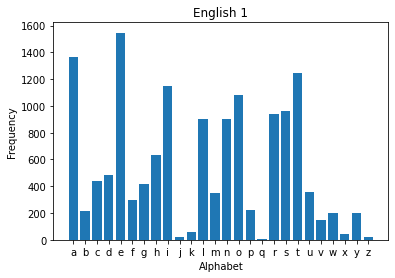

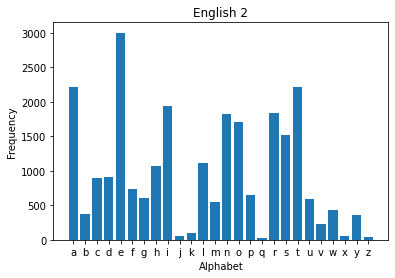

In [ ]:
unigram_eng1 = Counter(ngrams(eng1,1))
plothistogram(unigram_eng1)
plt.title('English 1')
plt.xlabel('Unigram')
plt.ylabel('Frequency')
plt.show()

unigram_eng2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('English 2')
plt.xlabel('Unigram')
plt.ylabel('Frequency')
plt.show()

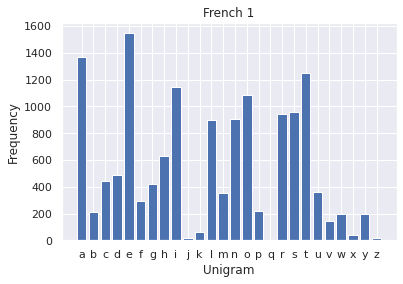

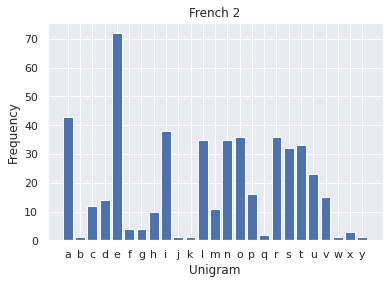

In [71]:
unigram_fr1 = Counter(ngrams(fr1,1))
plothistogram(unigram_eng1)
plt.title('French 1')
plt.xlabel('Unigram')
plt.ylabel('Frequency')
plt.show()

unigram_fr2 = Counter(ngrams(fr2,1))
plothistogram(unigram_fr2)
plt.title('French 2')
plt.xlabel('Unigram')
plt.ylabel('Frequency')
plt.show()

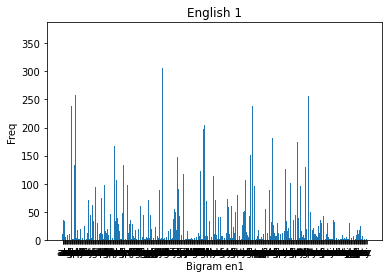

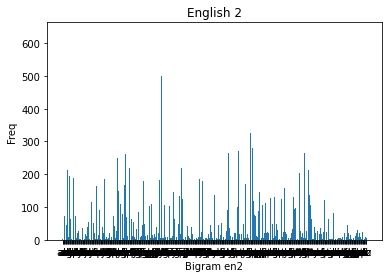

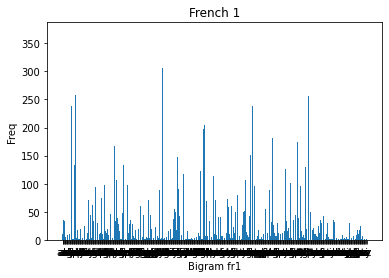

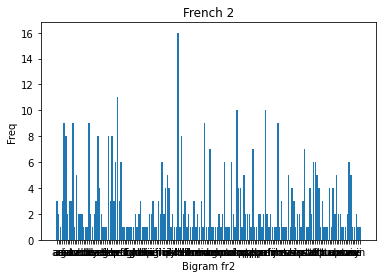

In [ ]:
bigram_eng1 = Counter(ngrams(eng1,2)) 
plothistogram(bigram_eng1)
plt.title('English 1')
plt.xlabel('Bigram en1')
plt.ylabel('Freq')
plt.show()

bigram_eng2 = Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.xlabel('Bigram en2')
plt.ylabel('Freq')
plt.show()

bigram_fr1 = Counter(ngrams(fr1,2))
plothistogram(bigram_eng1)
plt.title('French 1')
plt.xlabel('Bigram fr1')
plt.ylabel('Freq')
plt.show()

bigram_fr2 = Counter(ngrams(fr2,2))
plothistogram(bigram_fr2)
plt.title('French 2')
plt.xlabel('Bigram fr2')
plt.ylabel('Freq')
plt.show()

In [ ]:
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))]
  plt.imshow(freq, cmap = 'jet')
  return freq

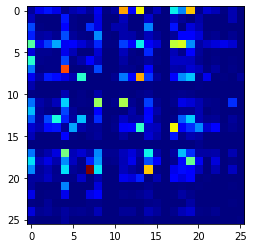

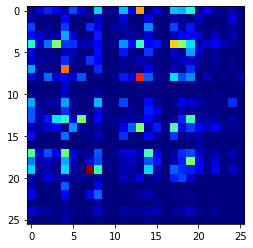

In [ ]:
bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bieng2 = plotbihistogram(bigram_eng2)

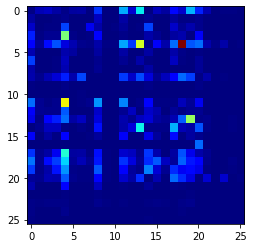

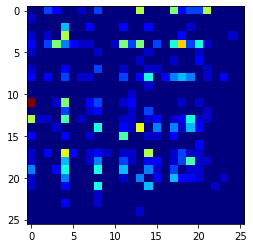

In [ ]:
bifr1 = plotbihistogram(bigram_fr1)
plt.show()
bifr2 = plotbihistogram(bigram_fr2)

In [ ]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')

In [ ]:
print('\nEnglish 1:')
ShowTopN(bieng1)
print('\nEnglish 2:')
ShowTopN(bieng2)
print('\nFrench 1:')
ShowTopN(bifr1)
print('\nFrench 2:')
ShowTopN(bifr2)


English 1:
('t', 'h') : 369.0
('h', 'e') : 306.0
('a', 'l') : 271.0
('i', 'n') : 269.0
('a', 't') : 258.0
('t', 'o') : 257.0
('a', 'n') : 239.0
('o', 'r') : 239.0
('e', 's') : 226.0
('e', 'r') : 215.0

English 2:
('t', 'h') : 632.0
('i', 'n') : 552.0
('h', 'e') : 499.0
('a', 'n') : 462.0
('e', 'r') : 435.0
('e', 's') : 338.0
('o', 'n') : 326.0
('e', 'd') : 325.0
('s', 't') : 319.0
('n', 'g') : 316.0

French 1:
('e', 's') : 471.0
('l', 'e') : 305.0
('e', 'n') : 287.0
('n', 't') : 251.0
('d', 'e') : 237.0
('r', 'e') : 185.0
('o', 'n') : 172.0
('a', 'n') : 169.0
('s', 'e') : 157.0
('a', 't') : 142.0

French 2:
('l', 'a') : 16.0
('e', 's') : 11.0
('r', 'e') : 10.0
('o', 'n') : 10.0
('d', 'e') : 9.0
('a', 'v') : 9.0
('r', 'o') : 9.0
('n', 'a') : 9.0
('a', 'n') : 9.0
('e', 'n') : 8.0


In [ ]:
from keras.datasets import mnist
 
#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
no1 = train_X[train_y==1,:,:] 
no0 = train_X[train_y==0,:,:] 


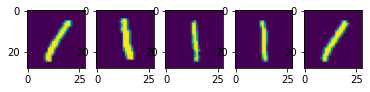

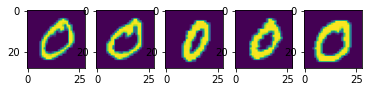

In [ ]:
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()

In [ ]:
sum1 = np.sum(no1>0, (1,2)) 
sum0 = np.sum(no0>0, (1,2))

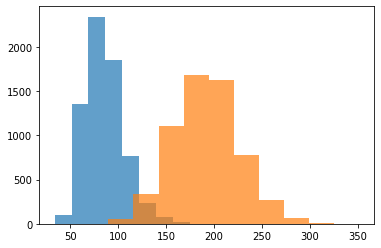

In [ ]:
plt.hist(sum1, alpha=0.7);
plt.hist(sum0, alpha=0.7);

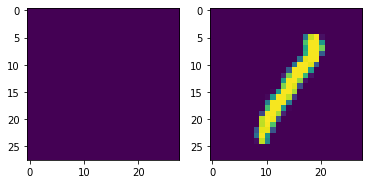

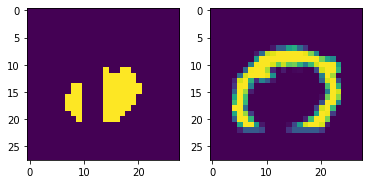

In [ ]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) 
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 
  hole = hull & ~ (img>0) 
  return hole

imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

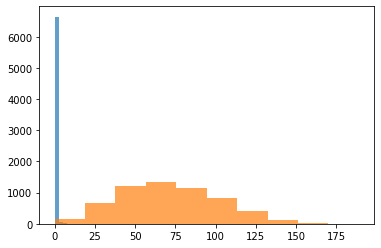

In [ ]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])
  
plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);

In [ ]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

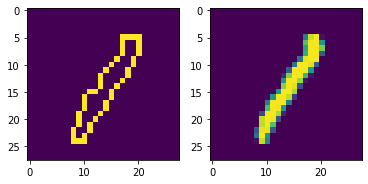

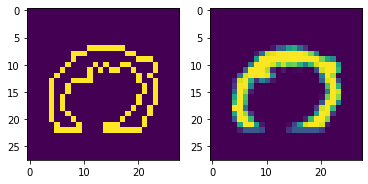

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

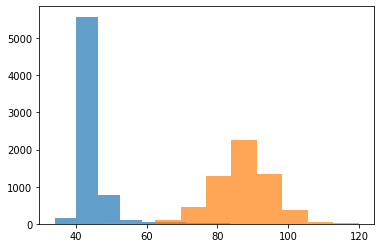

In [ ]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);

In [ ]:
import pandas as pd

df = pd.read_csv('/content/sample_data/california_housing_train.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
df.rename(columns={'oldName1':'newName1', 'oldName2':'newName2'})

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


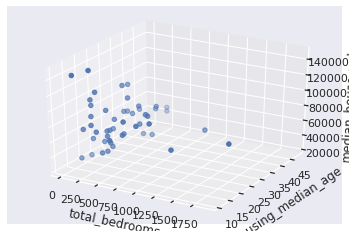

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df['total_bedrooms'][:50]
y = df['housing_median_age'][:50]
z = df['median_house_value'][:50]

ax.set_xlabel("total_bedrooms")
ax.set_ylabel("housing_median_age")
ax.set_zlabel("median_house_value")

ax.scatter(x, y, z)

plt.show()

TASK:

In [51]:
from google.colab import files


In [53]:
files.upload

<function google.colab.files.upload>

In [57]:
sales=pd.read_csv("10000 Sales Records.csv")

In [58]:
sales.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Chad,Office Supplies,Online,L,1/27/2011,292494523,2/12/2011,4484,651.21,524.96,2920025.64,2353920.64,566105.00
1,Europe,Latvia,Beverages,Online,C,12/28/2015,361825549,1/23/2016,1075,47.45,31.79,51008.75,34174.25,16834.50
2,Middle East and North Africa,Pakistan,Vegetables,Offline,C,1/13/2011,141515767,2/1/2011,6515,154.06,90.93,1003700.90,592408.95,411291.95
3,Sub-Saharan Africa,Democratic Republic of the Congo,Household,Online,C,9/11/2012,500364005,10/6/2012,7683,668.27,502.54,5134318.41,3861014.82,1273303.59
4,Europe,Czech Republic,Beverages,Online,C,10/27/2015,127481591,12/5/2015,3491,47.45,31.79,165647.95,110978.89,54669.06


In [60]:
sales.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [59]:
sales=sales.rename(columns={'oldName1':'newName1', 'oldName2':'newName2'})

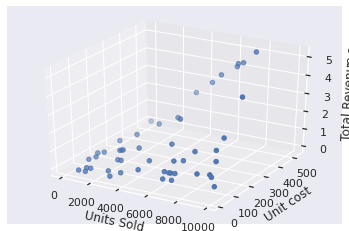

In [64]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')


x = sales['Units Sold'][:50]
y = sales['Unit Cost'][:50] # Total revenue is the total profit earned
z = sales['Total Revenue'][:50]  # Cost price of each unit

ax.set_xlabel("Units Sold")
ax.set_ylabel("Unit cost")
ax.set_zlabel("Total Revenue")

ax.scatter(x, y, z)

plt.show()

It is observed that the dependency on number of units sold is the highest